In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
%matplotlib notebook

<IPython.core.display.Javascript object>


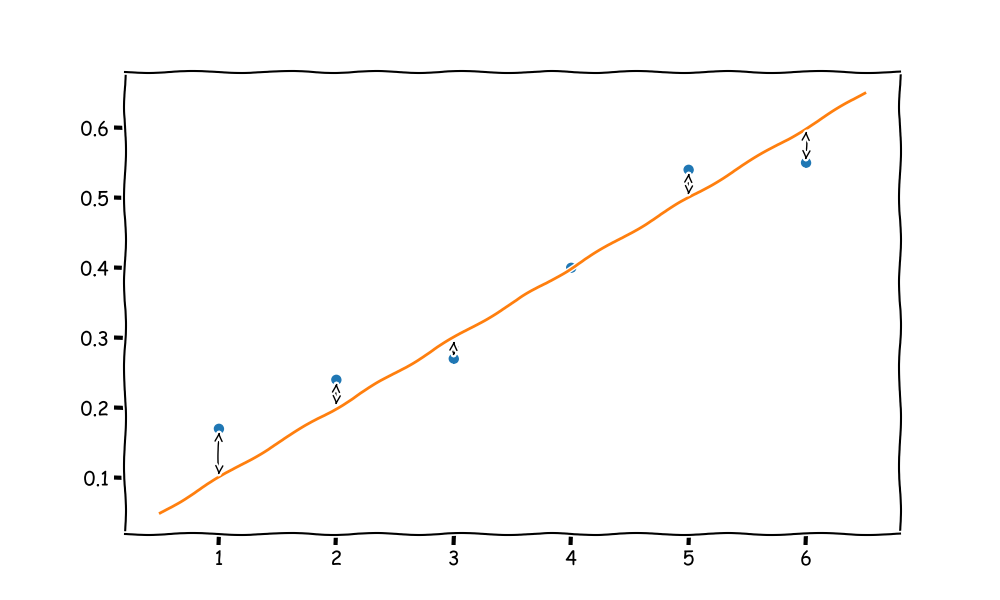

In [3]:
with plt.xkcd():
    x = [1,2,3,4,5,6]
    y = [0.17,0.24,0.27,0.4,0.54,0.55]
    plt.figure(figsize= (10,6))
    plt.plot(x,y, "o")
    plt.plot([0.5,6.5],[0.05, 0.65])
    #plt.annotate(r'$\sum(f(x)-y)^2$',xy=(1, 0.17), arrowprops=dict(arrowstyle='->'), xytext=(1.5, 0.3))
    plt.annotate('',xy=(1, 0.1), arrowprops=dict(arrowstyle='<->'), xytext=(1, 0.17))
    plt.annotate('',xy=(2, 0.2), arrowprops=dict(arrowstyle='<->'), xytext=(2, 0.24))
    plt.annotate('',xy=(3, 0.3), arrowprops=dict(arrowstyle='<->'), xytext=(3, 0.27))
    plt.annotate('',xy=(4, 0.4), arrowprops=dict(arrowstyle='<->'), xytext=(4, 0.4))
    plt.annotate('',xy=(5, 0.5), arrowprops=dict(arrowstyle='<->'), xytext=(5, 0.54))
    plt.annotate('',xy=(6, 0.6), arrowprops=dict(arrowstyle='<->'), xytext=(6, 0.55))

#hace aclaración de notación: 
    - Vectores son columna,
    -Mayus para matrices, bold para vectores

#Run these commands:
jupyter nbextension enable --py widgetsnbextension

In [4]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [5]:
#importing data

data_1 = np.genfromtxt("ex1data1.txt",delimiter = ',')
data_2 = np.genfromtxt("ex1data2.txt",delimiter = ',')

Añadir ejercicio de timing

<IPython.core.display.Javascript object>


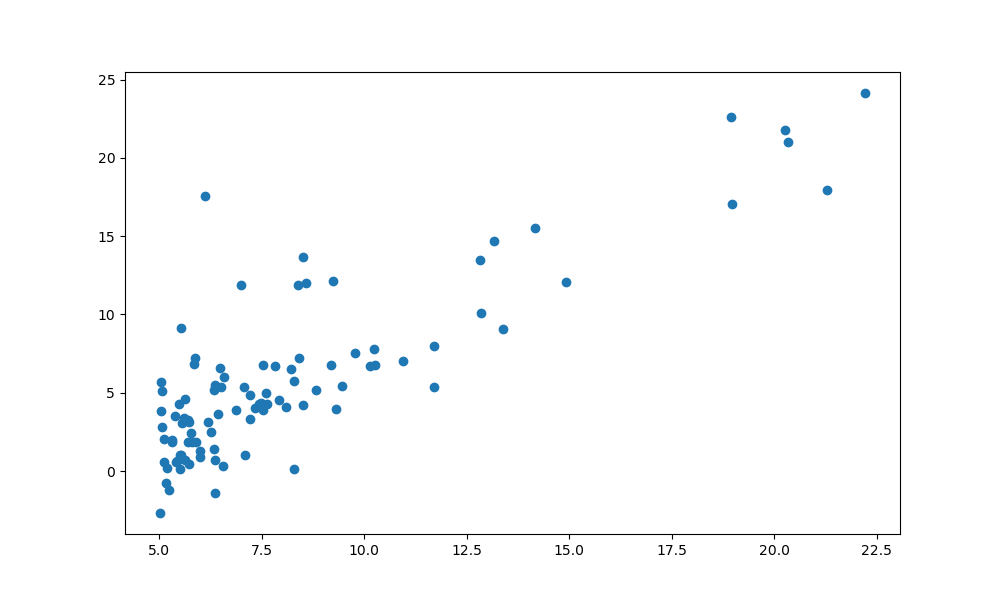

In [6]:
plt.figure(figsize= (10,6))
_ = plt.plot(data_1[:,0],data_1[:,1],"o")

One would like to find the line with the best fit to the given data. This is, finding linear model in the form 

\begin{equation}
    f_\theta(x) = \theta_0 + \theta_1x,
\end{equation}

that minimises its distance to the data points. One way to do this is to use a *cost function* $J_D(\theta)$ that is minimised when the distance between the fitted line and the data points is minimised. This cost function is known as the *least-squares cost function* and is given by

\begin{equation}
    J_{D}(\theta) = \frac{1}{2M} \sum_{i = 1}^{M}(f_\theta(x_i) - y_i)^2,
\end{equation}

where $D = \{x_i,y_i\}_{i=1}^{M}$ is the data set and M is the number of *observations* (_Note_: the division over 2M is mainly so that the cost function is not dependent on the number of observations). Therefore the parameters ($\theta_0$ and $\theta_1$) which give the best fit to the data are given by,

\begin{equation}
    \hat{\theta} = \operatorname*{argmin}_\theta J(\theta).
\end{equation}

Now, from now on the data will be arranged using matrices and vectors so we can use *linear algebra* to make things easier. Also, we will generalise to the case with more than one input variable, such that the linear model becomes

\begin{equation}
    f_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Nx_{X},
\end{equation}

which can be rearranged as,

\begin{equation}
    f_\theta(x) = \pmb{\theta}^T\mathbf{x},
\end{equation}

with $\pmb{\theta} = (\theta_0, \theta_1, ..., \theta_N)^T$ and $\pmb{x} = (1, x_1, ..., x_N)^T$. Furtheremore, one could use matrix multiplication to apply the linear function to *all* the inputs. This is done by constructing an input matrix $X$ which rows are the input vectors $\pmb{x}$, such that,

\begin{equation}
    X =
    \begin{pmatrix}
    -\pmb{x}_1-\\
    -\pmb{x}_2-\\
    ...\\
    -\pmb{x}_M-
    \end{pmatrix} = 
    \begin{pmatrix}
1 & x_{11} & x_{12}& ... & x_{1N}\\
1 & x_{21} & x_{22} &... & x_{2N}\\
...\\
1 & x_{M1} & x_{M2}& ... & x_{MN}
\end{pmatrix}
\end{equation}

and then simply multiplying this matrix by the $\pmb{\theta}$ vector.

\begin{equation}
f = X\pmb{\theta} = 
\begin{pmatrix}
1 & x_{11} & x_{12}& ... & x_{1N}\\
1 & x_{21} & x_{22} &... & x_{2N}\\
...\\
1 & x_{M1} & x_{M2}& ... & x_{MN}
\end{pmatrix}
    \begin{pmatrix}
    \theta_0\\
    \theta_1\\
    ...\\
    \theta_N
    \end{pmatrix} = 
\begin{pmatrix}
\theta_0 + \theta_1 x_{11} + \theta_2x_{12} +...+ \theta_Nx_{1N}\\
\theta_0 + \theta_1 x_{21} + \theta_2x_{22} +...+ \theta_Nx_{2N}\\
...\\
\theta_0 + \theta_1 x_{M1} + \theta_2x_{M2} +...+ \theta_Nx_{MN}
\end{pmatrix}=
\begin{pmatrix}
\pmb{\theta}^T\mathbf{x}_1\\
\pmb{\theta}^T\mathbf{x}_2\\
...\\
\pmb{\theta}^T\mathbf{x}_M
\end{pmatrix}=
\begin{pmatrix}
f_\theta(\pmb{x}_1)\\
f_\theta(\pmb{x}_2)\\
...\\
f_\theta(\pmb{x}_M)
\end{pmatrix}
\end{equation}

Furtheremore, it is possible to use this notation to express the cost function as,

\begin{equation}
    J_{D}(\theta) =\frac{1}{2M}(X\pmb{\theta} - \textbf{y})^T(X\pmb{\theta} - \textbf{y}) =
    \frac{1}{2M}
    \begin{pmatrix}
    f_\theta(\pmb{x}_1) - y_1\\ 
    f_\theta(\pmb{x}_2) - y_2\\
    ...\\
    f_\theta(\pmb{x}_M) - y_M, 
    \end{pmatrix}^T
       \begin{pmatrix}
    f_\theta(\pmb{x}_1) - y_1\\
    f_\theta(\pmb{x}_2) - y_2\\
    ...\\
    f_\theta(\pmb{x}_M) - y_M\\
    \end{pmatrix}
    =\frac{1}{2M}\sum_{i = 1}^{M}(f_\theta(\pmb{x}_i)  - y_i)^2
\end{equation}

Writing equations in a vectorised fashion is not only helpful for readability, but its computaionally more elegant and efficient as it will be shown in the next code. Let's now implement these ideas.

HABLAR DEL VECTOR Y TAMBIEN USAR LOS TERMINOS TARGET INPUT OUTPUT



In [7]:
#Let's reshape the data into de X and y form given above. 
X = np.ones((data_1.shape[0],2))
X[:,1]=data_1[:,0]
y = data_1[:,1]

#Also, let's define the cost function:
def linear_regression_cost(theta, X, y):
    m = X.shape[0]
    return 1/(2*m)*(X@theta - y).T@(X@theta - y) #<-- compact and clear cost function

#For a demostration we'll implement the cost function using loops. 
def slow_linear_regression_cost(theta, X, y):
    m = X.shape[0]
    resp = 0
    for i in range(m):
        for j in range (X.shape[1]):
            resp += X[i,j]*theta[j]
            
    return 1/(2*m)*resp

Let's now time bot functions with any $\pmb\theta$

In [8]:
%%timeit
linear_regression_cost(np.array([0.5,0.5]), X,y)

11.3 µs ± 37.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%%timeit
slow_linear_regression_cost(np.array([0.5,0.5]), X,y)

161 µs ± 35.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Notice that the vectorise form is more than 10 times faster. For large scale implementations this time difference can become significant, so it's important to write efficient code.

Now, we need to minimize the cost function to find the linear fit of the data. The least-squares cost function has a closed form minimum can be found by finding $\pmb{\theta}$ where the gradient of the function to zero. This is, 

\begin{equation}
    \vec{\nabla} J_D(\theta) = 
    \left(\frac{\partial J}{\partial \theta_0},
    \frac{\partial J}{\partial \theta_1}, ..., \frac{\partial J}{\partial \theta_N}\right)^T = \pmb{0}
\end{equation}

It's possible to show that this is achieved when,

\begin{equation}
    \hat{\pmb{\theta}} = \operatorname*{argmin}_\theta J(\theta)= (X^TX)^{-1}X^T\textbf{y}
\end{equation}

Therefore, with just a set of matrix operations it's possible to find the best linear fit to the data. For full derivation of this ecuation please refer to: https://en.wikipedia.org/wiki/Least_squares#Solving_the_least_squares_problem

ADD REFERENCE TO OPTIMIZATION

__Note__: In general, having zero gradient is not a necessary nor sufficient contidion for a point to be a minimum. However, in the case of an *unbounded quadratic cost function* a point having zero gradient is guaranteed to be a minimum, so the the "zero-gradient" condition becomes necessary and sufficient. 

closed_solution, _ = np.linalg.lstsq(X,y)

In [10]:
%%timeit
cs = np.linalg.inv((X.T@X))@X.T@y

18 µs ± 24.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
#%%timeit #<-- uncoment to compare the timing
#numpy's function linalg.lstsq implements the above given solution, so the best fit can be easily found
closed_solution = np.linalg.lstsq(X,y,rcond=None)[0]

In [12]:
print(closed_solution)

[-3.89578088  1.19303364]


<IPython.core.display.Javascript object>


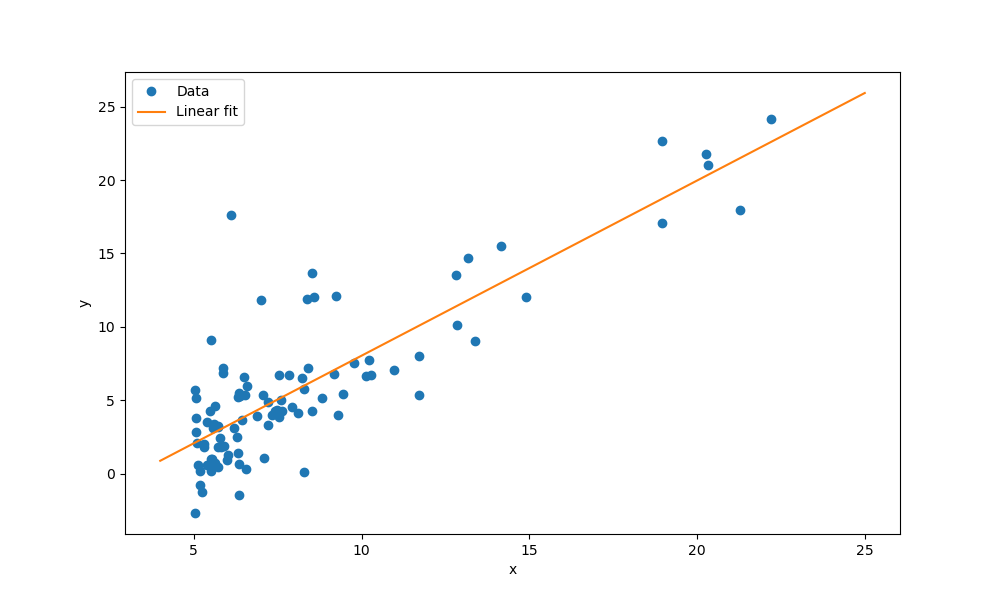

In [13]:
a = np.linspace(4,25,100)
plt.figure(figsize= (10,6))
plt.plot(data_1[:,0],data_1[:,1],"o", label = "Data")
plt.plot(a,closed_solution[0]+closed_solution[1]*a, label = "Linear fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()


# 2. Linear regression using alpha gradient descent

The linear regression cost function is one of the few cost functions with a closed form solution. In the future we will be interested in optimizing costs functions different to the least squares one, which may not have the same nice properties (i.e. convexity) as this one. For this reason we'll indtroduuce a widely used optimization method known as *alpha gradient descent* (or just *gradient descent*). The idea is the following: given a random initial point in the cost function, if one constantly moves in the opposite direction of the gradient of the function, one should arrive to a local minimum of the function (which is also the global minimum for this case). 

The algorithm works as follow: 

1) Start in a random initial parameter vector $\pmb{\theta}_0$, and define a convergence criterion

2) While the convergence criterion is false, update the parameter with the update rule $\pmb{\theta}_{k+1} = \pmb{\theta}_{k} - \alpha\nabla J$, where $k$ is the iteration number, $\nabla J$ is the gradient of the cost function with respect to the parameter vector, $\alpha$ is known as the *learning rate* and controls how big each step is.

3) Stop if the convergence criterion is met. 

We now need the gradient of the cost funtion:


\begin{equation}
\nabla_\theta J = 
\nabla_\theta\left(\frac{1}{2M} \sum_{i = 1}^{M}(f_\theta(\pmb{x}_i) - y_i)^2\right),
\end{equation}

which by linearity of derivation can be written as,

\begin{equation}
\nabla_\theta J = \frac{1}{2M} \sum_{i = 1}^{M}\nabla_\theta(f_\theta(\pmb{x}_i) - y_i)^2.
\end{equation}

Then, applying the *chain rule*

\begin{equation}
\nabla_\theta J = \frac{1}{2M} \sum_{i = 1}^{M}2(f_\theta(\pmb{x}_i) - y_i)\nabla_\theta f_\theta(x_i) = \frac{1}{M} \sum_{i = 1}^{M}(f_\theta(\pmb{x}_i) - y_i)\nabla_\theta (\pmb\theta^T\pmb{x}_i),
\end{equation}

\begin{equation}
\nabla_\theta J = \frac{1}{M} \sum_{i = 1}^{M}(f_\theta(\pmb{x}_i) - y_i)\pmb{x}_i,
\end{equation}

Which can be written vectorised as,

\begin{equation}
\nabla_\theta J = \frac{1}{M}X^T(X\pmb{\theta} - y).
\end{equation}

The implementation is done in the next block of code.

In [14]:
#todo: change the random condition

#defining a function that computes the gradient 
def linear_regression_grad(theta, X, y):
    m = X.shape[0] 
    return (1/m)*X.T@(X@theta-y)

def descent_grad(alpha, X, y, theta = None):
    
    if theta is None:
        theta = 20*np.random.random(X.shape[1])
        
    m = X.shape[0]
    stop_condition = True #<-- Stopping condition
    thetas = [] #<-- List where the thetas at each step are stored for plotting.
    costs = [] #<-- List where the cost value are stored for plotting
    while stop_condition: 
        #prediction =  X@theta 
        #gradiente = (1/m)*X.T@(prediction-y) 
        thetas.append(theta) #<-- Store the previous values
        gradient = linear_regression_grad(theta, X, y) #<-- Compute the gradient
        costs.append(linear_regression_cost(theta, X, y)) #<-- store the previous costs
        theta = theta - alpha*gradient #<-- Update step
        stop_condition = np.linalg.norm(alpha*gradient) > 0.0001 #<-- stop if step is "too small" 
    
    thetas = np.array(thetas)
    return theta, thetas, costs #<-- return 


<IPython.core.display.Javascript object>


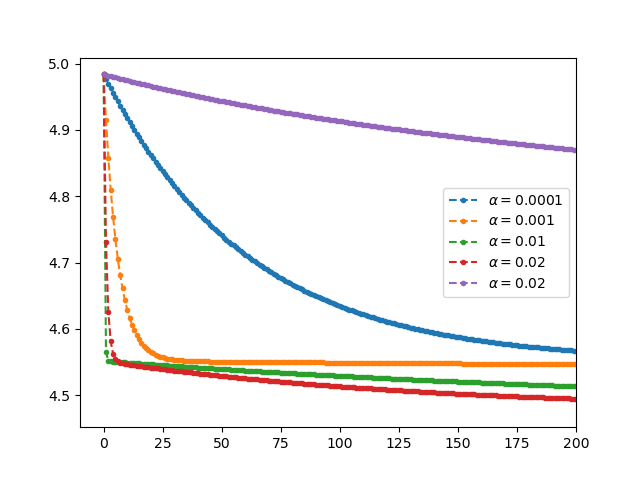

In [15]:
plt.figure()
initial = np.array([-3,1])
plt.plot(descent_grad(0.0001, X, y, initial)[2], "o--",ms = 3, label = r"$\alpha = 0.0001$")
plt.plot(descent_grad(0.001, X, y, initial)[2], "o--",ms = 3, label = r"$\alpha = 0.001$")
plt.plot(descent_grad(0.01, X, y, initial)[2], "o--",ms = 3, label = r"$\alpha = 0.01$")
plt.plot(descent_grad(0.02, X, y, initial)[2], "o--",ms = 3, label = r"$\alpha = 0.02$")
plt.plot(descent_grad(0.02432, X, y, initial)[2], "o--",ms = 3, label = r"$\alpha = 0.02$")
plt.xlim(-10,200)
plt.legend()

In [16]:
def plot_background():

    thetas_0 = np.linspace(-20,20,100)
    thetas_1 = np.linspace(-10,10,100)
    thetas_0_mesh, thetas_1_mesh = np.meshgrid(thetas_0, thetas_1)

    #aclarar que no es la forma más eficiente. 
    costs_for_thetas = [linear_regression_cost(np.array([theta_0, theta_1]), X,y)
                        for theta_1 in thetas_1 for theta_0 in thetas_0]         
            
    costs_for_thetas = np.array(costs_for_thetas).reshape(100,100)

    fig, ax = plt.subplots(figsize=(10,7))
    line, = ax.plot([0],[0], "o--", c = 'r')
    ax.contourf(thetas_0_mesh, thetas_1_mesh, np.log(costs_for_thetas), 100, cmap = "GnBu")
    CS = ax.contour(thetas_0_mesh, thetas_1_mesh, np.log(costs_for_thetas), 10, cmap = "gray", alpha = 0.5)
    plt.clabel(CS, inline=1, fontsize=10)
    return ax, fig, line

def plot_gradient_descent(alpha,ax, line, beta_init = None, cont = False, gradients = False):      
    
    if beta_init is not None:
        thetas, theta_list, losses = descent_grad(alpha,X,y,beta_init)
    
    else: 
        thetas, theta_list, losses = descent_grad(alpha,X,y)
        
    thetas_0_g = np.linspace(-20,20,20)
    thetas_1_g = np.linspace(-10,10,20)
    thetas_0_mesh_g, thetas_1_mesh_g = np.meshgrid(thetas_0_g, thetas_1_g)

    gradients_0 = [linear_regression_grad(np.array([theta_0, theta_1]), X, y)[0]
                   for theta_1 in thetas_1_g for theta_0 in thetas_0_g]
    gradients_1 = [linear_regression_grad(np.array([theta_0, theta_1]), X, y)[1]
                   for theta_1 in thetas_1_g for theta_0 in thetas_0_g]

    close_solution_theta = np.linalg.lstsq(X,y, rcond = None)[0]
    
    if gradients:
        ax.quiver(thetas_0_mesh_g, thetas_1_mesh_g, gradients_0, gradients_1, width = 0.001, headwidth = 7)
    line.set_xdata(theta_list[:,0])
    line.set_ydata(theta_list[:,1])
    ax.plot(close_solution_theta[0], close_solution_theta[1], 'x', ms = 15, c = 'k')
  
    return fig, ax, line


<IPython.core.display.Javascript object>


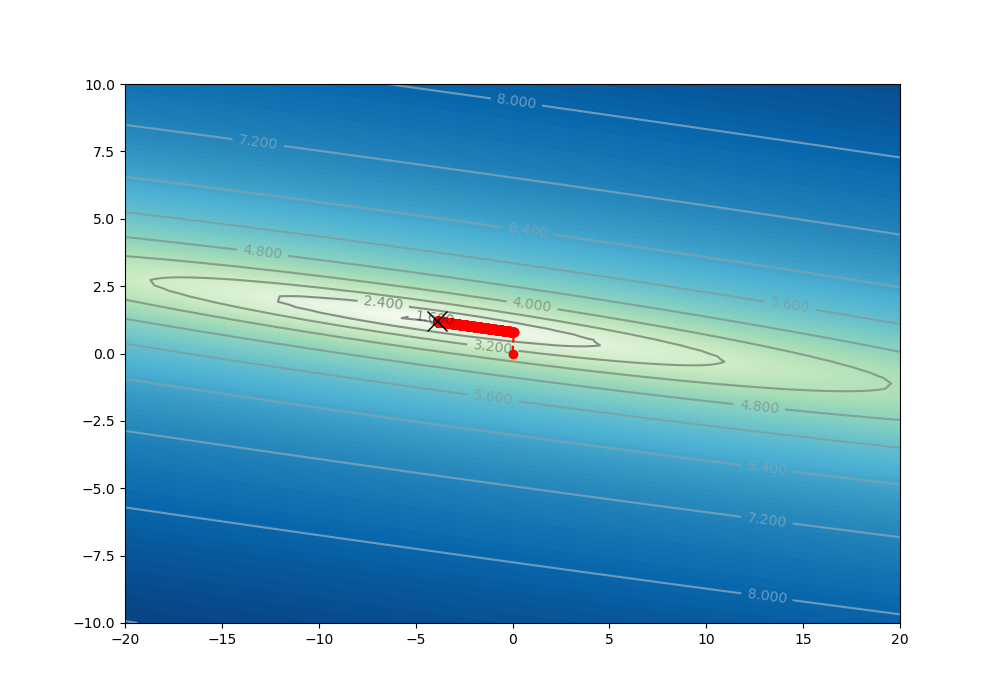

interactive(children=(FloatSlider(value=0.012, description='alpha', max=0.024, min=0.001, step=0.001), IntSlid…

In [17]:
thetas_0 = np.linspace(-20,20,100)
thetas_1 = np.linspace(-10,10,100)
thetas_0_mesh, thetas_1_mesh = np.meshgrid(thetas_0, thetas_1)

costs_for_thetas = [linear_regression_cost(np.array([theta_0, theta_1]), X,y)
                    for theta_1 in thetas_1 for theta_0 in thetas_0]         

costs_for_thetas = np.array(costs_for_thetas).reshape(100,100)

fig, ax = plt.subplots(figsize=(10,7))
line, = ax.plot([0],[0], "o--", c = 'r')
ax.contourf(thetas_0_mesh, thetas_1_mesh, np.log(costs_for_thetas), 100, cmap = "GnBu")
CS = ax.contour(thetas_0_mesh, thetas_1_mesh, np.log(costs_for_thetas), 10, cmap = "gray", alpha = 0.5)
plt.clabel(CS, inline=1, fontsize=10)

@interact(alpha = (0.001,0.024,0.001), beta_0 = (-20,20), beta_1 = (-10,10),
          random_initial = False, show_gradients = False)
def fun (alpha, beta_0, beta_1, random_initial, show_gradients):
    print(show_gradients)
    if random_initial:
        plot_gradient_descent(alpha, ax, line, gradients = show_gradients)
    
    else:
        plot_gradient_descent(alpha, ax, line, np.array([beta_0, beta_1]), gradients = show_gradients)
    fig.canvas.draw()
#a = widgets.FloatSlider(description='a', min = 0.001, max = 0.024, step = 0.001)
#out = widgets.interactive_output(fun, {'alpha': a})
#widgets.HBox([widgets.HBox([a]), out])


# 3. Linear regression for non-linear fitting

At first glance it would seem that linear regression is not very usefull since it can only fit linear models. However, it is possible to extent linear regression to fit more complex models like polynomic or exponential models for example. For instance, let's suppose that one would like to find a cuadratic fit of the data. The model would then be,

\begin{equation}
f(x) = \theta_0 + \theta_1x + \theta_2x^2.
\end{equation}

It would then be possible to define two new variables $x_1=x$ and $x_2=x^2$, such that,


\begin{equation}
\pmb{f}(X) = 
\begin{pmatrix}
1 & x_{11} & x_{12}\\
1 & x_{21} & x_{22}\\
...\\
1 & x_{M1} & x_{M2}\\
\end{pmatrix}
\begin{pmatrix}
\theta_0\\
\theta_1\\
\theta_2
\end{pmatrix}= 
\begin{pmatrix}
1 & x_{1} & x^2_{1}\\
1 & x_{2} & x^2_{2}\\
...\\
1 & x_{M} & x^2_{M}\\
\end{pmatrix}
\begin{pmatrix}
\theta_0\\
\theta_1\\
\theta_2
\end{pmatrix}
\end{equation}

In this sense we just need to construct a $X$ matrix where the rows are transformed accoringly to the model we need, and as long as the transformation can be written in the $X\pmb{\theta}$ form, we can use the linear regression method described to fit the data. In general, linear regresion still works of one constructs a matrix where each row is a non-linear vector transformation $(\pmb\phi)$ of the input data.

\begin{equation}
X =
\begin{pmatrix}
-\pmb{\phi}(\pmb{x}_0)-\\
-\pmb{\phi}(\pmb{x}_1)-\\
...\\
-\pmb{\phi}(\pmb{x}_M)-
\end{pmatrix}
\end{equation}

Therefore, one could fit models like,

\begin{equation}
f(x) = \theta_0 + \theta_1\log{x}, 
\end{equation}

or,

\begin{equation}
f(x) = \theta_0 + \theta_1e^x + \theta_2x^3, 
\end{equation}

and many more!!



Let's try this out by fitting a polynomic model pf degree d to the data. This is the same as defining $\pmb{\phi}(\pmb{x})$ to be,

\begin{equation}
\pmb{\phi}(x) = \left(1, x, x^2, ... , x^d\right)
\end{equation}

In [18]:
#We define the function that maps the inputs to a polynomial of arbitrary degree.
def map_to_higher(data_x, degree):
    
    resp = np.ones((data_x.shape[0], degree+1))
    for i in range(1, degree +1):
        resp[:,i] = data_x**i
        
    return resp

<IPython.core.display.Javascript object>


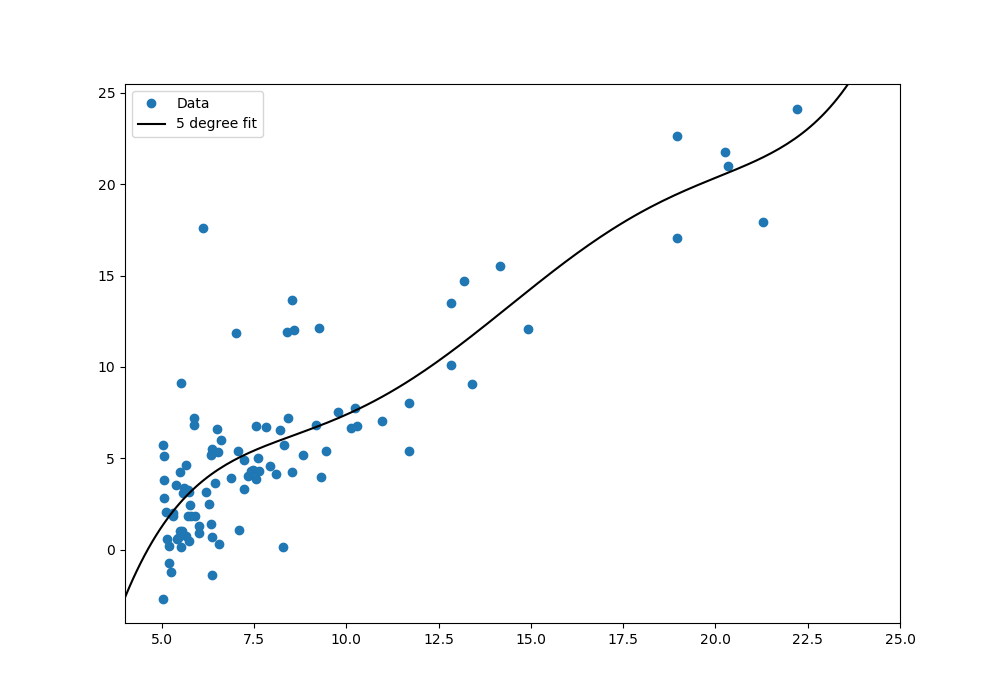

interactive(children=(IntSlider(value=5, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlim(4,25)
ax.plot(data_1[:,0],data_1[:,1],"o", label = "Data")
line, = ax.plot([0],[0], c = 'k', )

@interact(degree = (1,10))
def plot_for_degrees(degree):
    X_hd = map_to_higher(data_1[:,0],degree)
    high_dimentional_answer = np.linalg.lstsq(X_hd, y, rcond = None)[0]

    a = np.linspace(4,25,200)
    b = map_to_higher(a, degree)

    line.set_xdata(a)
    line.set_ydata(b@high_dimentional_answer)
    line.set_label(str(degree) + " degree fit")
    fig.canvas.draw()
    plt.legend()

# 4. Further reading

In [120]:
import numpy as np
from numpy import sin, cos

from scipy.constants import g
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider

#%matplotlib

In [121]:
def regular(r_0, v, th, t):
    v_0 = [v*cos(th), v*sin(th)]
    x = r_0[0] + v_0[0]*t
    y = r_0[1] + v_0[1]*t -0.5*g*t**2
    return x, y

def first_order(r_0, v, th, t):
    exp = np.exp(-b*t)
    v_0 = [v*cos(th), v*sin(th)]
    x = (r_0[0]*b + v_0[0]*(1 - exp))/b
    y = (g*(-b*t-exp+1) + b*(b*r_0[1] - v_0[1]*(exp - 1)))/(b**2)
    return x, y

<IPython.core.display.Javascript object>


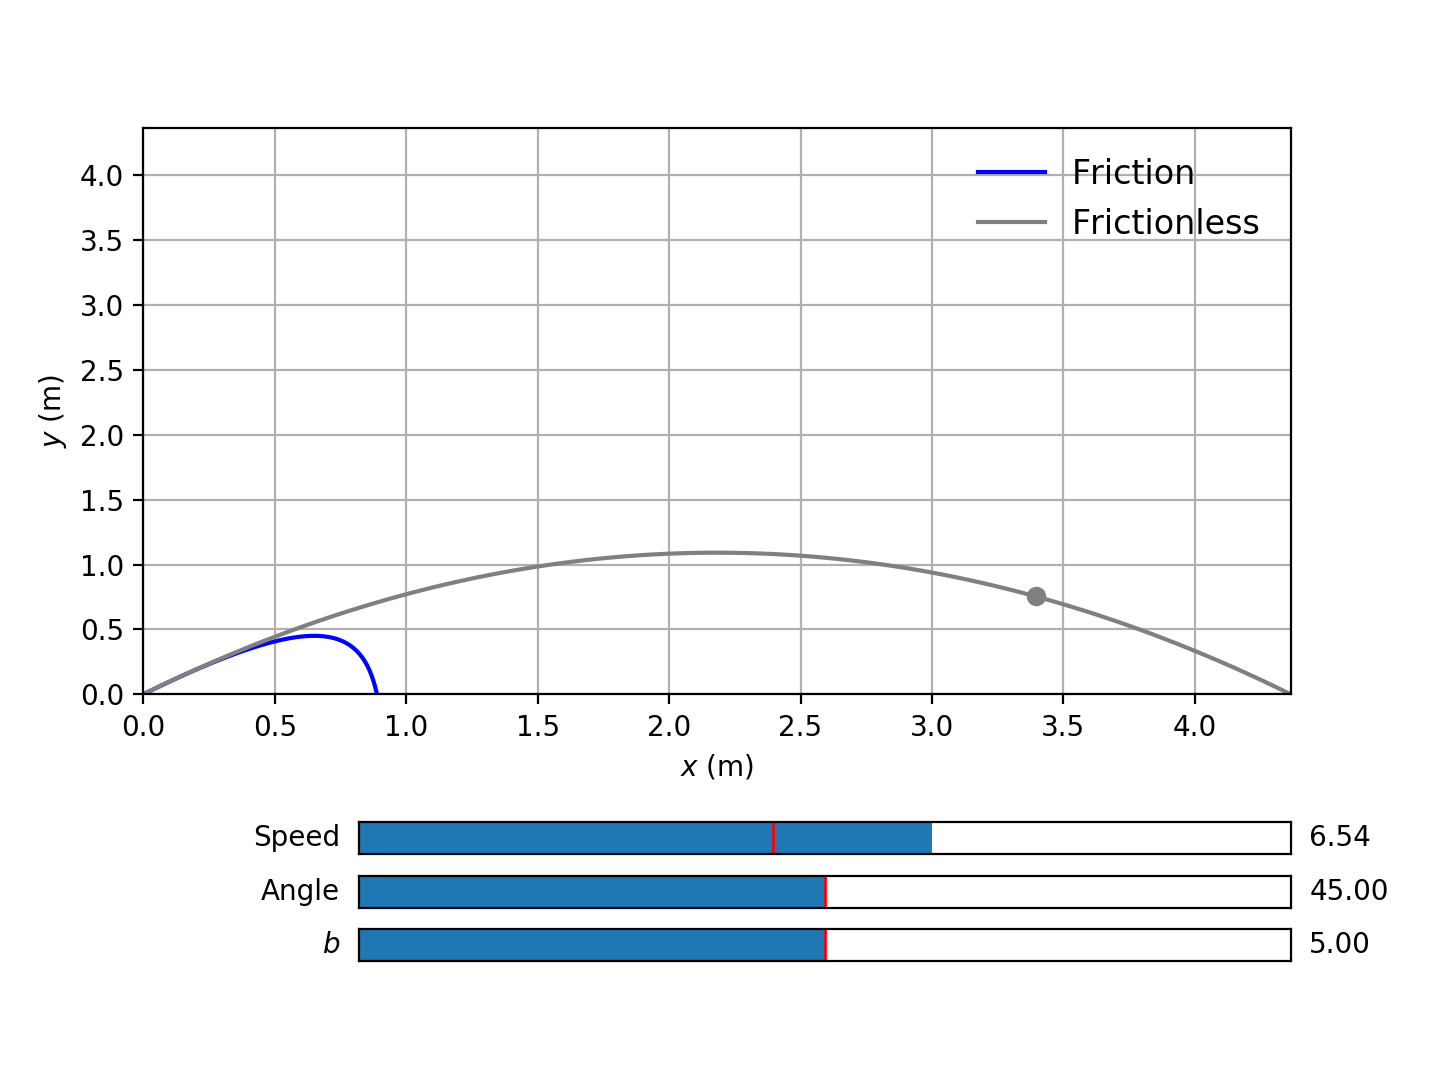

In [122]:
fig, ax1 = plt.subplots()
ax1.grid()

fig.subplots_adjust(left=0.1, bottom=0.35)

colors = ["blue", "grey"]
labels = ["Friction", "Frictionless"]
static = [ax1.plot([], [], '-', c = colors[i], label = labels[i])[0] for i in range(2)]
dynamic = [ax1.plot([], [], 'o', c = colors[i])[0] for i in range(2)]

ax1.legend(fontsize=12).get_frame().set_alpha(0.0) # legenda en la gráfica
ax1.set_xlabel("$x$ (m)")
ax1.set_ylabel("$y$ (m)")

# subejes para los sliders
axb = plt.axes([0.25, 0.1, 0.65, 0.03]) 
axangle = plt.axes([0.25, 0.15, 0.65, 0.03])
axspeed = plt.axes([0.25, 0.20, 0.65, 0.03])

# sliders
sb = Slider(axb, '$b$', 0.0001, 10, valinit=5)
sangle = Slider(axangle, 'Angle', 1, 89.0, valinit=45)
sspeed = Slider(axspeed, 'Speed', 1, 10.0, valinit=5)

N = 100

def init(*vals):
    global xs, ys, b
    
    b, th, v = sb.val, sangle.val, sspeed.val
    r_0 = np.zeros(2)
    th = np.deg2rad(th)
    
    t_max = 2*v*sin(th)/g
    t = np.linspace(0, t_max, N)
    
    x_f, y_f = first_order(r_0, v, th, t)
    x_n, y_n = regular(r_0, v, th, t)
    
    max_x = max(x_n)
    max_y = max(y_n)
    if max_x < max_y:
        max_x = max_y
    
    ax1.set_xlim(0, max_x)
    ax1.set_ylim(0, max_x)
    
    xs = [x_f, x_n]
    ys = [y_f, y_n]
    
    for i in range(2):
        static[i].set_data(xs[i], ys[i])
        
    return xs, ys

sb.on_changed(init)
sangle.on_changed(init)
sspeed.on_changed(init)

def update(i):
    for j in range(2):
        dynamic[j].set_data(xs[j][i], ys[j][i])
    return tuple(dynamic)

ani = animation.FuncAnimation(fig, update, N, interval = N/5, init_func=init)

#ani.save("ProjectileMotion.gif", writer = "imagemagick", fps = N/5)
plt.show()